# Sales Analysis

# import libraries

In [4]:
import pandas as pd
import os


# merging 12 months data into a single file (all_months_merged)
 

In [5]:
'''files = {file for file in os.listdir('/content/SalesData')}
all_data = pd.DataFrame()
for file in files:
  df = pd.read_csv('/content/SalesData/'+file)
  all_data = pd.concat([all_data , df])'''

"files = {file for file in os.listdir('/content/SalesData')}\nall_data = pd.DataFrame()\nfor file in files:\n  df = pd.read_csv('/content/SalesData/'+file)\n  all_data = pd.concat([all_data , df])"

In [6]:
#all_data.to_csv("all_months_merged.csv", index = False)

In [7]:
complete_df = pd.read_csv('/content/all_months_merged.csv')
complete_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up Data

#### drop NaN rows

In [8]:
complete_df.dropna(inplace = True)

In [9]:
complete_df.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

#### drop instablity in the month column that is added


In [10]:
complete_df['Month'] = complete_df["Order Date"].str[0:2]

In [11]:
df1=complete_df[complete_df["Order Date"].str[0:2] == 'Or']
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [12]:
complete_df=complete_df[complete_df["Order Date"].str[0:2] != 'Or']
complete_df['Month'] = complete_df['Month'].astype('int32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
complete_df.Month.value_counts()
# Month column is cleaned

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

#### change the datatype of Price Each and Quantity column

In [14]:
complete_df['Price Each'] = complete_df['Price Each'].astype('float')
complete_df['Quantity Ordered'] = complete_df['Quantity Ordered'].astype('int32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


# Total Sales for each month 


#### add a sale column (sale = Price Each * Quantity Ordered)

In [16]:
complete_df['Sale'] = complete_df['Price Each'].mul(complete_df['Quantity Ordered'])
complete_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### analyse and plot

In [17]:
monthly_sale = complete_df.groupby('Month').sum()

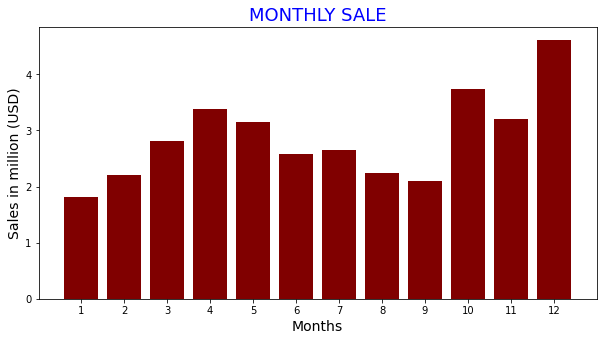

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.title("MONTHLY SALE", fontsize = 18, color = 'b')

plt.xlabel("Months", fontsize = 14)
plt.ylabel("Sales in million (USD)", fontsize = 14)

months = range(1,13)

plt.bar(months, monthly_sale['Sale']/10**6, color ='maroon')

plt.xticks(months)
plt.show()

In [19]:
#code to change the month's format (like 2 to February)

import datetime, calendar
months = [x for x in range(1,13)]

p=[]
for a in range(1,13):
  p.append(calendar.month_name[a])


z = zip(months, p)
month_dictt = dict(z)
print(month_dictt)
print(month_dictt.values())

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
dict_values(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


# City Sales 

In [20]:
complete_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


#### Create a seperate and dedicated dataframe

In [21]:
complete_df[['Street', 'City', 'State(ZIP)']] = complete_df['Purchase Address'].str.split(',' , expand = True)
complete_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,State(ZIP)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


In [28]:
complete_df.sample()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,State(ZIP)
65481,297197,AA Batteries (4-pack),1,3.84,12/19/19 06:40,"363 Washington St, San Francisco, CA 94016",12,3.84,363 Washington St,San Francisco,CA 94016


In [30]:
complete_df[['col1','col2','col3']] = complete_df['State(ZIP)'].str.split(' ' , expand = True)
complete_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,State(ZIP),col1,col2,col3
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,,CA,90001


In [31]:
#drop unrequire columns as we only need city and state columns

city_df = complete_df.drop(columns = ['col1','col3','State(ZIP)'], axis=0)
city_df.head(3)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,col2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA


In [32]:
city_df['City(State)'] = city_df['City'] + '(' + city_df['col2'] + ')'
city_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,col2,City(State)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,Los Angeles(CA)


#### analyse and plot

In [33]:
city_sale = city_df.groupby('City(State)').sum()
city_sale.sort_values('Sale')

,Quantity Ordered,Price Each,Month,Sale
City(State),,,,
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
Seattle(WA),16553,2.733296e+06,104941,2.747755e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06


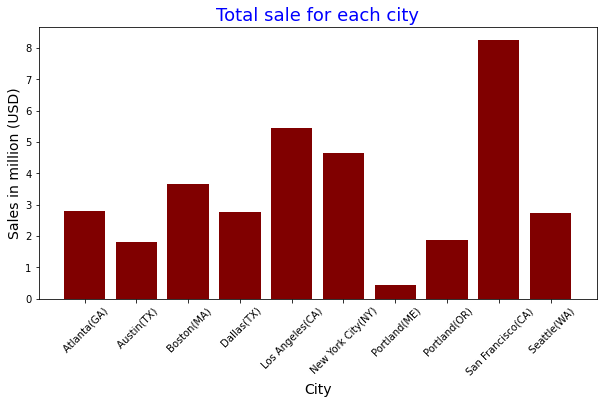

In [34]:
plt.figure(figsize = (10,5))
plt.title("Total sale for each city", fontsize = 18, color = 'b')

plt.xlabel("City", fontsize = 14)
plt.ylabel("Sales in million (USD)", fontsize = 14)

plt.xticks(rotation = 45)

plt.bar(city_sale.index, city_sale['Sale']/10**6, color ='maroon')

plt.show()

# When to display advertisement to maximize the sale?

#### Extract hourly data by converting the datatype of the Purchase Date column

In [36]:
import datetime as dt
complete_df['Order Date'] = pd.to_datetime(complete_df['Order Date'])

In [37]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sale              185950 non-null  float64       
 8   Street            185950 non-null  object        
 9   City              185950 non-null  object        
 10  State(ZIP)        185950 non-null  object        
 11  col1              185950 non-null  object        
 12  col2              185950 non-null  object        
 13  col3              185950 non-null  object        
dtypes: d

In [38]:
complete_df['Hour'] = complete_df['Order Date'].dt.hour

In [39]:
complete_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,State(ZIP),col1,col2,col3,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,,TX,75001,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,,MA,02215,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,,CA,90001,14


#### Analyse and plot

In [40]:
hourly_sale = complete_df.groupby('Hour').count()
hourly_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,State(ZIP),col1,col2,col3
Hour,,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854,854


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


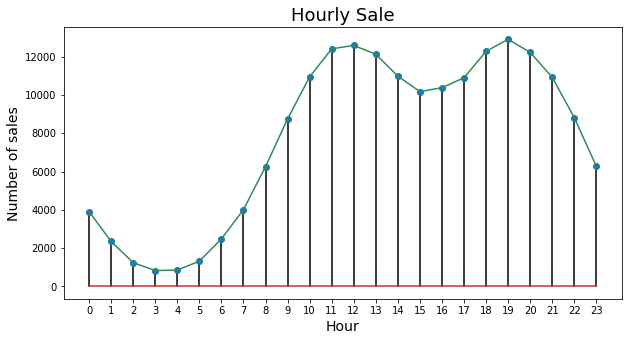

In [45]:
plt.figure(figsize = (10,5))
plt.title("Hourly Sale", fontsize = 18)

plt.xlabel("Hour", fontsize = 14)
plt.ylabel('Number of sales', fontsize = 14)
plt.xticks(hourly_sale.index)


plt.stem(hourly_sale.index,hourly_sale.Sale, linefmt='Black')
plt.plot(hourly_sale.index,hourly_sale.Sale, color = 'seagreen')

plt.show()

#The right time would be just an hour before the peak sale count(10am and 5pm)

# What product is sold the most?

In [99]:
complete_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,State(ZIP),Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,9


In [131]:
count_df = complete_df.groupby('Product').sum()
count_df.sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Month,Sale,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529
Wired Headphones,20557,226395.18,133397,246478.43,271720
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
iPhone,6849,4789400.00,47941,4794300.00,98657


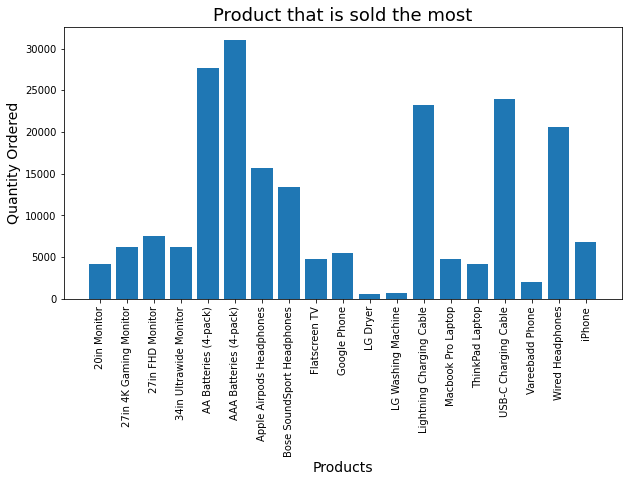

In [136]:
plt.figure(figsize = (10,5), frameon=False)
plt.title("Product that is sold the most", fontsize = 18)

plt.xticks(rotation=90)

plt.xlabel('Products', fontsize = 14)
plt.ylabel('Quantity Ordered', fontsize = 14)
plt.bar(count_df.index,count_df['Quantity Ordered'])
plt.show()

#### Is it related to Price?

In [177]:
price_df = complete_df.groupby('Product').mean()['Price Each']

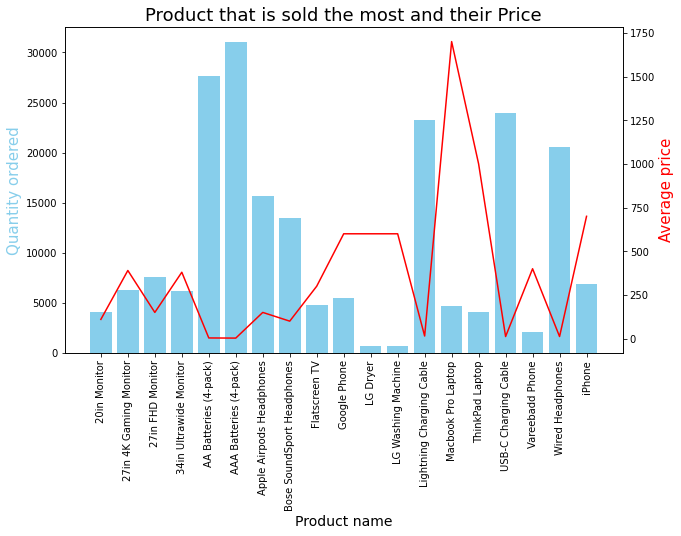

In [178]:
plt.figure(figsize = (10,6), frameon=False)
plt.title("Product that is sold the most and their Price", fontsize = 18)

axis1 = plt.gca()
axis2 = axis1.twinx()


axis1.set_xlabel('Product name', fontsize = 14)
axis1.set_xticklabels(count_df.index, rotation=90)

#plt.ylabel('Quantity Ordered', fontsize = 14)
axis1.bar(count_df.index,count_df['Quantity Ordered'], color = 'skyblue')
axis1.set_ylabel('Quantity ordered', color = 'skyblue', fontsize = 15)

axis2.plot(price_df.index,price_df.values, color = 'red')
axis2.set_ylabel('Average price', color = 'red', fontsize = 15)

plt.show()

# Products that are priced higher are sold less.

# What products are often sold together?

In [54]:
#complete_df.drop(columns=['col1','col2','col3'], inplace = True) 
complete_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,State(ZIP),Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,14


In [55]:
df_st = complete_df[complete_df['Order ID'].duplicated(keep= False)]
#(keep = False) is passed cause we want to code to return all duplicates
df_st.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,State(ZIP),Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA 90001,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA 90001,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,11
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,11


#### add a new column Grouped which contains the products having the same orderID

In [59]:
df_st['Grouped'] = df_st.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_st.head()

# has duplicates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Street,City,State(ZIP),Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA 90001,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA 90001,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


#### Analyse and plot

In [66]:
df_st1 = df_st[['Grouped','Order ID']].drop_duplicates()
df_st1

,Grouped,Order ID
3,"Google Phone,Wired Headphones",176560
18,"Google Phone,USB-C Charging Cable",176574
30,"Bose SoundSport Headphones,Bose SoundSport Hea...",176585
32,"AAA Batteries (4-pack),Google Phone",176586
119,"Lightning Charging Cable,USB-C Charging Cable",176672
...,...,...
186627,"iPhone,Lightning Charging Cable",150287
186644,"iPhone,Lightning Charging Cable",150303
186665,"Google Phone,USB-C Charging Cable,Apple Airpod...",150323
186679,"iPhone,Apple Airpods Headphones",150335


In [76]:
df_st2 = df_st1[['Grouped','Order ID']].groupby('Grouped').count().sort_values('Order ID', ascending = False)

In [97]:
df_st2 = df_st2.head(10)
df_st2

,Order ID
Grouped,
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303
"iPhone,Apple Airpods Headphones",286
"Google Phone,Bose SoundSport Headphones",161
"Vareebadd Phone,Wired Headphones",104
"Google Phone,USB-C Charging Cable,Wired Headphones",77


<BarContainer object of 10 artists>

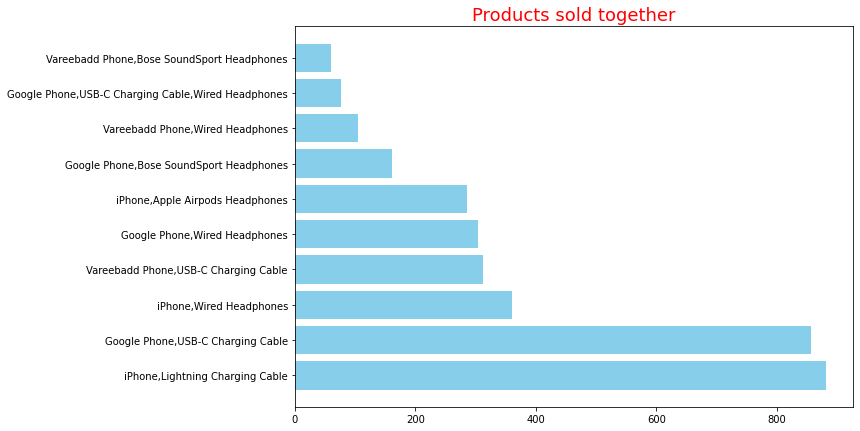

In [98]:
plt.figure(figsize = (10,7))
plt.title("Products sold together", fontsize = 18, color = 'r')
plt.barh(df_st2.index, df_st2['Order ID'], color = 'skyblue')